In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import glob
import os

In [6]:
with h5py.File("/content/drive/MyDrive/Neuroscience/H5/Female\
 adult C/853.000_853 interaction.analysis.h5", "r") as f:
    print("Available datasets:")
    def printname(name):
        print(name)
    f.visit(printname)  # This will print all dataset names


Available datasets:
edge_inds
edge_names
instance_scores
labels_path
node_names
point_scores
provenance
track_names
track_occupancy
tracking_scores
tracks
video_ind
video_path


In [7]:
import h5py
import numpy as np
import os

# Specify the file path
file_path = "/content/drive/MyDrive/Neuroscience/H5/Female adult C/853.000_853 interaction.analysis.h5"

# Initialize an empty list to hold the track data from the file
tracks_list = []

# Process the specified file
with h5py.File(file_path, "r") as f:
    # Read and transpose the "tracks" dataset
    tracks = f["tracks"][:].transpose(3, 0, 2, 1)
    tracks_list.append(tracks)

    # Extract additional datasets and node names
    edge_inds = f["edge_inds"][:]
    edge_names = f["edge_names"][:]
    node_names = [n.decode() for n in f["node_names"][:].tolist()]

# Concatenate all track data along the frames axis (axis=0)
trx = np.concatenate(tracks_list, axis=0)

# Get the new shape parameters
n_frames, n_tracks, n_nodes, _ = trx.shape

# Print out the details
print("Node names:", node_names)
print("Total Frames:", n_frames)
print("Tracks:", n_tracks)
print("Nodes:", n_nodes)


Node names: ['nose', 'left_ear', 'right_ear', 'neck', 'tail']
Total Frames: 19200
Tracks: 2
Nodes: 5


In [8]:
# Get the index of the nodes of interest from their names.
nose_ind = node_names.index("nose")
tail_base_ind = node_names.index("tail")

# Pull out the coordinates for just those nodes.
noses = trx[:, :, nose_ind]
tail_bases = trx[:, :, tail_base_ind]

nose_invalid_mask = np.isnan(noses)
tail_base_invalid_mask = np.isnan(tail_bases)

# Compute pairwise distances while retaining NaN values
nose_to_nose = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(noses, axis=1),
    axis=-1
)

nose_to_tail_base = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(tail_bases, axis=1),
    axis=-1
)

# Identify invalid cases for distances:
# For `nose_to_nose`, any invalid value along axis 1 or 2 should result in a distance of 0.
nose_to_nose[
    np.any(np.expand_dims(nose_invalid_mask, axis=2) | np.expand_dims(nose_invalid_mask, axis=1), axis=-1)] = 0

# For `nose_to_tail_base`, any invalid value in noses (axis 2) or tail_bases (axis 1) should result in a distance of 0.
nose_to_tail_base[
    np.any(np.expand_dims(nose_invalid_mask, axis=2) | np.expand_dims(tail_base_invalid_mask, axis=1), axis=-1)
] = 0

# The final results:
print("Shape of nose_to_nose:", nose_to_nose.shape)
print("Shape of nose_to_tail_base:", nose_to_tail_base.shape)

# Optional: Check for zero distances where NaN was involved
print("Zero distances in nose_to_nose:", np.count_nonzero(nose_to_nose == 0))
print("Zero distances in nose_to_tail_base:", np.count_nonzero(nose_to_tail_base == 0))

Shape of nose_to_nose: (19200, 2, 2)
Shape of nose_to_tail_base: (19200, 2, 2)
Zero distances in nose_to_nose: 65018
Zero distances in nose_to_tail_base: 44310


In [9]:
nose_to_tail_base

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       ...,

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [10]:
tail_bases

array([[[nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan]],

       ...,

       [[nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan]]])

In [11]:
nose_to_tail_base[:, 0, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
nose_to_tail_base[10000:11000, 1, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.43203125e+02,
       7.37725191e+02, 7.19061111e+02, 0.00000000e+00, 0.00000000e+00,
      

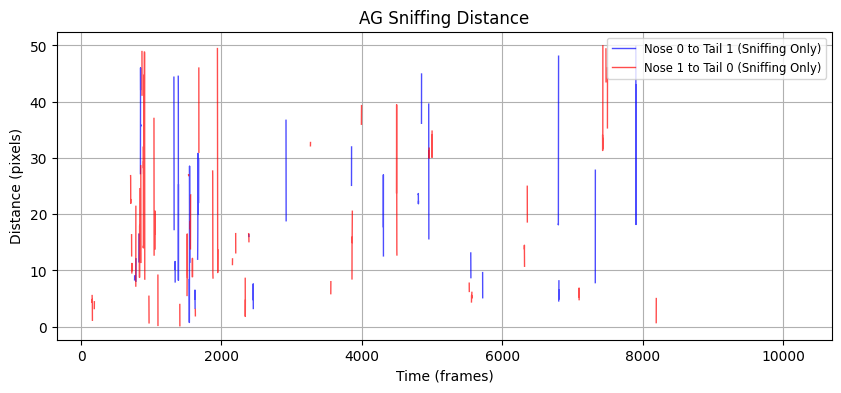

AG sniffing duration (total): 12.07 seconds


In [13]:
# Define the threshold for AG sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Compute the distances between noses and tail bases
nose_to_tail_base = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(tail_bases, axis=1), axis=-1
)

# Filter distances within the threshold for AG sniffing
nose_to_tail_sniffing_0_1 = np.where(nose_to_tail_base[:10200, 0, 1] <= threshold_pixels, nose_to_tail_base[:10200, 0, 1], np.nan)
nose_to_tail_sniffing_1_0 = np.where(nose_to_tail_base[:10200, 1, 0] <= threshold_pixels, nose_to_tail_base[:10200, 1, 0], np.nan)

# Plot the AG sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(nose_to_tail_sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Tail 1 (Sniffing Only)", color="blue")
plt.plot(nose_to_tail_sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Tail 0 (Sniffing Only)", color="red")
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend(loc="upper right", fontsize="small", ncol=1)
plt.title("AG Sniffing Distance")
plt.grid(True)
plt.show()

# Calculate AG sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_tail_sniffing_0_1))  # Count sniffing frames for Nose 0 to Tail 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_tail_sniffing_1_0))  # Count sniffing frames for Nose 1 to Tail 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"AG sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


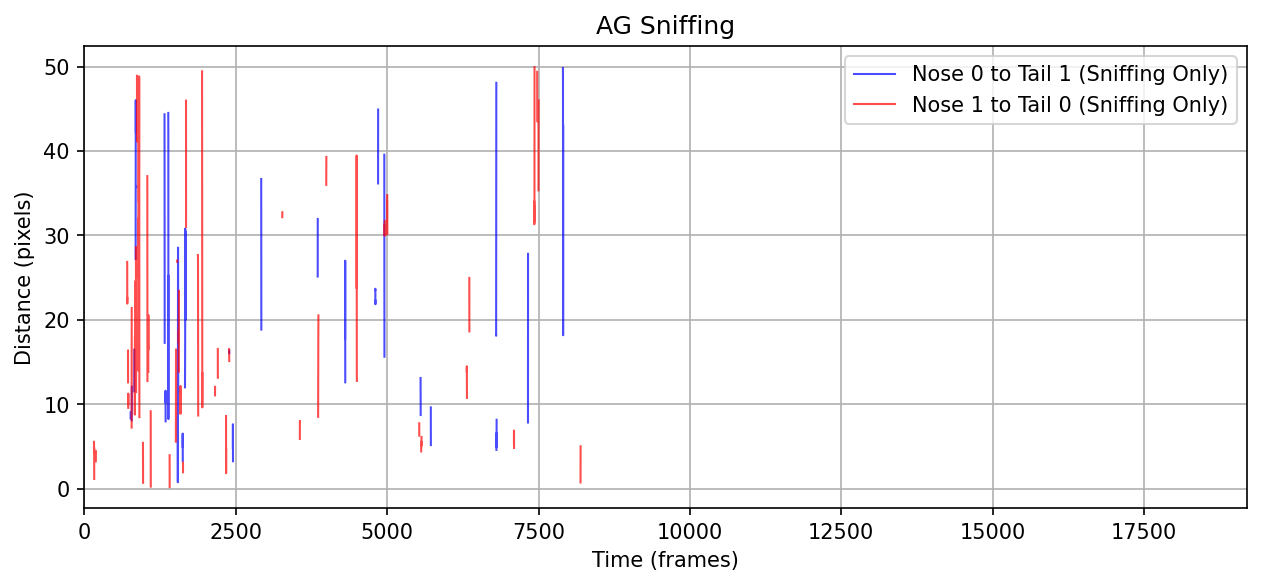

AG sniffing duration (total): 12.07 seconds


In [14]:
# Define the threshold for AG sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Compute the distances between noses and tail bases
nose_to_tail_base = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(tail_bases, axis=1), axis=-1
)

# Filter distances within the threshold for AG sniffing
nose_to_tail_sniffing_0_1 = np.where(nose_to_tail_base[:10200, 0, 1] <= threshold_pixels, nose_to_tail_base[:10200, 0, 1], np.nan)
nose_to_tail_sniffing_1_0 = np.where(nose_to_tail_base[:10200, 1, 0] <= threshold_pixels, nose_to_tail_base[:10200, 1, 0], np.nan)

# Get the total number of frames in the video
total_frames = nose_to_tail_base.shape[0]

# Extend x-axis but plot only for the first 10200 frames
x_values = np.arange(total_frames)
sniffing_0_1 = np.full(total_frames, np.nan)
sniffing_1_0 = np.full(total_frames, np.nan)

# Fill the first 10200 frames with valid data
sniffing_0_1[:10200] = nose_to_tail_sniffing_0_1
sniffing_1_0[:10200] = nose_to_tail_sniffing_1_0

# Plot the AG sniffing distances
plt.figure(figsize=(10, 4), dpi=150)
plt.plot(x_values, sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Tail 1 (Sniffing Only)", color="blue")
plt.plot(x_values, sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Tail 0 (Sniffing Only)", color="red")
plt.xlim(0, total_frames)  # Extend x-axis to the full number of frames
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("AG Sniffing")
plt.grid(True)
plt.show()

# Calculate AG sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_tail_sniffing_0_1))  # Count sniffing frames for Nose 0 to Tail 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_tail_sniffing_1_0))  # Count sniffing frames for Nose 1 to Tail 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"AG sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


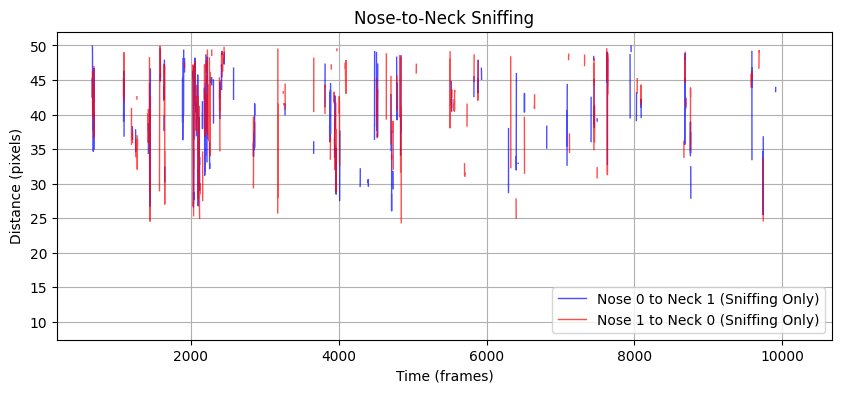

Nose-to-neck sniffing duration (total): 33.83 seconds


In [15]:
# Define the threshold for nose-to-neck sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and necks
nose_ind = node_names.index("nose")
neck_ind = node_names.index("neck")
noses = trx[:, :, nose_ind]
necks = trx[:, :, neck_ind]

# Compute the distances between noses and necks
nose_to_neck_base = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(necks, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-neck sniffing
nose_to_neck_sniffing_0_1 = np.where(nose_to_neck_base[:10200, 0, 1] <= threshold_pixels, nose_to_neck_base[:10200, 0, 1], np.nan)
nose_to_neck_sniffing_1_0 = np.where(nose_to_neck_base[:10200, 1, 0] <= threshold_pixels, nose_to_neck_base[:10200, 1, 0], np.nan)

# Plot the nose-to-neck sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(nose_to_neck_sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Neck 1 (Sniffing Only)", color="blue")
plt.plot(nose_to_neck_sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Neck 0 (Sniffing Only)", color="red")
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Neck Sniffing")
plt.grid(True)
plt.show()

# Calculate nose-to-neck sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_neck_sniffing_0_1))  # Count sniffing frames for Nose 0 to Neck 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_neck_sniffing_1_0))  # Count sniffing frames for Nose 1 to Neck 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-neck sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


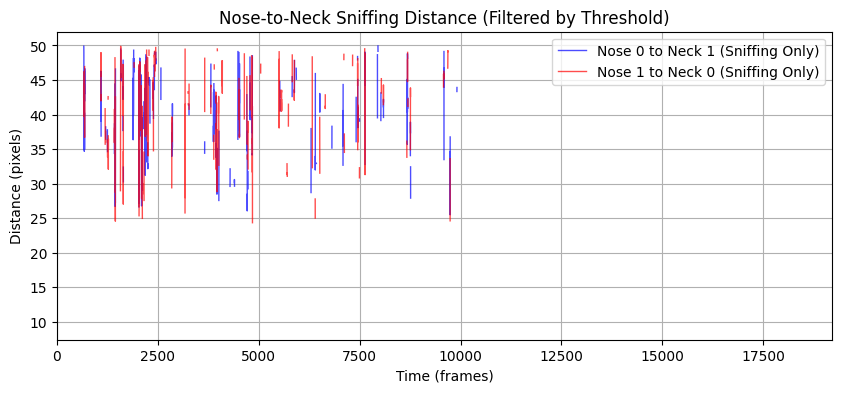

Nose-to-neck sniffing duration (total): 33.83 seconds


In [16]:
# Define the threshold for nose-to-neck sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and necks
nose_ind = node_names.index("nose")
neck_ind = node_names.index("neck")
noses = trx[:, :, nose_ind]
necks = trx[:, :, neck_ind]

# Compute the distances between noses and necks
nose_to_neck_base = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(necks, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-neck sniffing
nose_to_neck_sniffing_0_1 = np.where(nose_to_neck_base[:10200, 0, 1] <= threshold_pixels, nose_to_neck_base[:10200, 0, 1], np.nan)
nose_to_neck_sniffing_1_0 = np.where(nose_to_neck_base[:10200, 1, 0] <= threshold_pixels, nose_to_neck_base[:10200, 1, 0], np.nan)

# Get the total number of frames in the video
total_frames = nose_to_neck_base.shape[0]

# Extend x-axis but plot only for the first 10200 frames
x_values = np.arange(total_frames)
sniffing_0_1 = np.full(total_frames, np.nan)
sniffing_1_0 = np.full(total_frames, np.nan)

# Fill the first 10200 frames with valid data
sniffing_0_1[:10200] = nose_to_neck_sniffing_0_1
sniffing_1_0[:10200] = nose_to_neck_sniffing_1_0

# Plot the nose-to-neck sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(x_values, sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Neck 1 (Sniffing Only)", color="blue")
plt.plot(x_values, sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Neck 0 (Sniffing Only)", color="red")
plt.xlim(0, total_frames)  # Extend x-axis to the full number of frames
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Neck Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-neck sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_neck_sniffing_0_1))  # Count sniffing frames for Nose 0 to Neck 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_neck_sniffing_1_0))  # Count sniffing frames for Nose 1 to Neck 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-neck sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


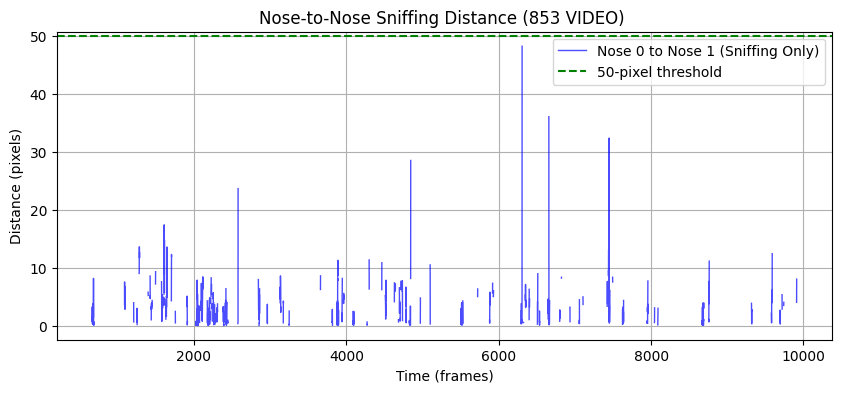

Nose-to-nose sniffing duration: 23.70 seconds


In [17]:
# Define the threshold for nose-to-nose sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses
nose_ind = node_names.index("nose")
noses = trx[:, :, nose_ind]

# Compute the distances between noses
nose_to_nose = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(noses, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-nose sniffing
nose_to_nose_sniffing = np.where(nose_to_nose[:10200, 0, 1] <= threshold_pixels, nose_to_nose[:10200, 0, 1], np.nan)

# Plot the nose-to-nose sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(nose_to_nose_sniffing, lw=1, alpha=0.7, label="Nose 0 to Nose 1 (Sniffing Only)", color="blue")
plt.axhline(y=threshold_pixels, color='green', linestyle='--', label="50-pixel threshold")  # Add threshold line
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Nose Sniffing Distance (853 VIDEO) ")
plt.grid(True)
plt.show()

# Calculate nose-to-nose sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames = np.sum(~np.isnan(nose_to_nose_sniffing))  # Count frames with sniffing
sniffing_duration_seconds = sniffing_frames / fps

print(f"Nose-to-nose sniffing duration: {sniffing_duration_seconds:.2f} seconds")


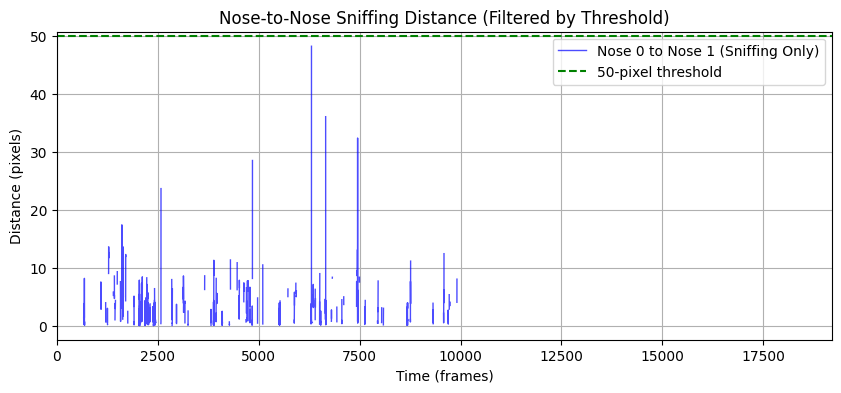

Nose-to-nose sniffing duration: 23.70 seconds


In [18]:
# Define the threshold for nose-to-nose sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses
nose_ind = node_names.index("nose")
noses = trx[:, :, nose_ind]

# Compute the distances between noses
nose_to_nose = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(noses, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-nose sniffing
nose_to_nose_sniffing = np.where(nose_to_nose[:10200, 0, 1] <= threshold_pixels, nose_to_nose[:10200, 0, 1], np.nan)

# Get the total number of frames in the video
total_frames = nose_to_nose.shape[0]

# Extend x-axis but plot only for the first 10200 frames
x_values = np.arange(total_frames)
sniffing = np.full(total_frames, np.nan)

# Fill the first 10200 frames with valid data
sniffing[:10200] = nose_to_nose_sniffing

# Plot the nose-to-nose sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(x_values, sniffing, lw=1, alpha=0.7, label="Nose 0 to Nose 1 (Sniffing Only)", color="blue")
plt.axhline(y=threshold_pixels, color='green', linestyle='--', label="50-pixel threshold")  # Add threshold line
plt.xlim(0, total_frames)  # Extend x-axis to the full number of frames
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Nose Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-nose sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames = np.sum(~np.isnan(nose_to_nose_sniffing))  # Count frames with sniffing
sniffing_duration_seconds = sniffing_frames / fps

print(f"Nose-to-nose sniffing duration: {sniffing_duration_seconds:.2f} seconds")


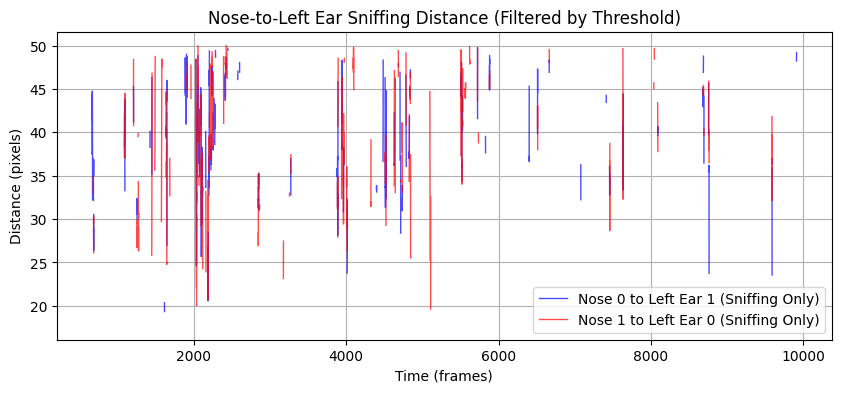

Nose-to-left ear sniffing duration (total): 30.90 seconds


In [19]:
# Define the threshold for nose-to-left ear sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and left ears
nose_ind = node_names.index("nose")
left_ear_ind = node_names.index("left_ear")
noses = trx[:, :, nose_ind]
left_ears = trx[:, :, left_ear_ind]

# Compute the distances between noses and left ears
nose_to_left_ear = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(left_ears, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-left ear sniffing
nose_to_left_ear_sniffing_0_1 = np.where(nose_to_left_ear[:10200, 0, 1] <= threshold_pixels, nose_to_left_ear[:10200, 0, 1], np.nan)
nose_to_left_ear_sniffing_1_0 = np.where(nose_to_left_ear[:10200, 1, 0] <= threshold_pixels, nose_to_left_ear[:10200, 1, 0], np.nan)

# Plot the nose-to-left ear sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(nose_to_left_ear_sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Left Ear 1 (Sniffing Only)", color="blue")
plt.plot(nose_to_left_ear_sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Left Ear 0 (Sniffing Only)", color="red")

plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Left Ear Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-left ear sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_left_ear_sniffing_0_1))  # Count sniffing frames for Nose 0 to Left Ear 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_left_ear_sniffing_1_0))  # Count sniffing frames for Nose 1 to Left Ear 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-left ear sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


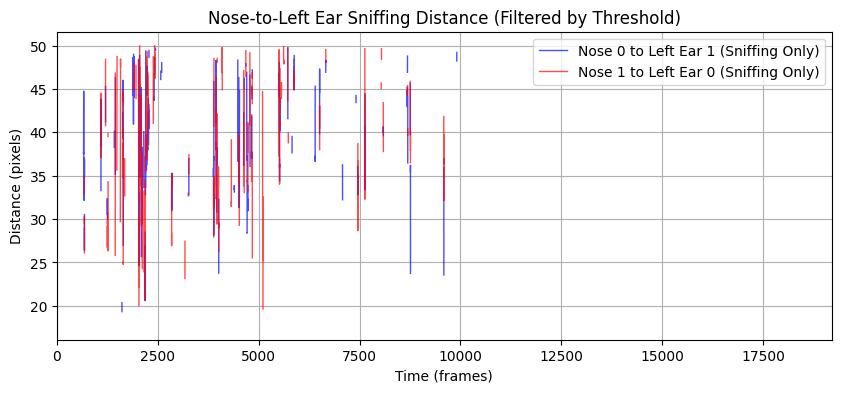

Nose-to-left ear sniffing duration (total): 30.90 seconds


In [20]:
# Define the threshold for nose-to-left ear sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and left ears
nose_ind = node_names.index("nose")
left_ear_ind = node_names.index("left_ear")
noses = trx[:, :, nose_ind]
left_ears = trx[:, :, left_ear_ind]

# Compute the distances between noses and left ears
nose_to_left_ear = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(left_ears, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-left ear sniffing
nose_to_left_ear_sniffing_0_1 = np.where(nose_to_left_ear[:10200, 0, 1] <= threshold_pixels, nose_to_left_ear[:10200, 0, 1], np.nan)
nose_to_left_ear_sniffing_1_0 = np.where(nose_to_left_ear[:10200, 1, 0] <= threshold_pixels, nose_to_left_ear[:10200, 1, 0], np.nan)

# Get the total number of frames in the video
total_frames = nose_to_left_ear.shape[0]

# Extend x-axis but plot only for the first 10200 frames
x_values = np.arange(total_frames)
sniffing_0_1 = np.full(total_frames, np.nan)
sniffing_1_0 = np.full(total_frames, np.nan)

# Fill the first 10200 frames with valid data
sniffing_0_1[:10200] = nose_to_left_ear_sniffing_0_1
sniffing_1_0[:10200] = nose_to_left_ear_sniffing_1_0

# Plot the nose-to-left ear sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(x_values, sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Left Ear 1 (Sniffing Only)", color="blue")
plt.plot(x_values, sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Left Ear 0 (Sniffing Only)", color="red")
plt.xlim(0, total_frames)  # Extend x-axis to the full number of frames
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Left Ear Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-left ear sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_left_ear_sniffing_0_1))  # Count sniffing frames for Nose 0 to Left Ear 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_left_ear_sniffing_1_0))  # Count sniffing frames for Nose 1 to Left Ear 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-left ear sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


In [21]:
left_ears.shape

(19200, 2, 2)

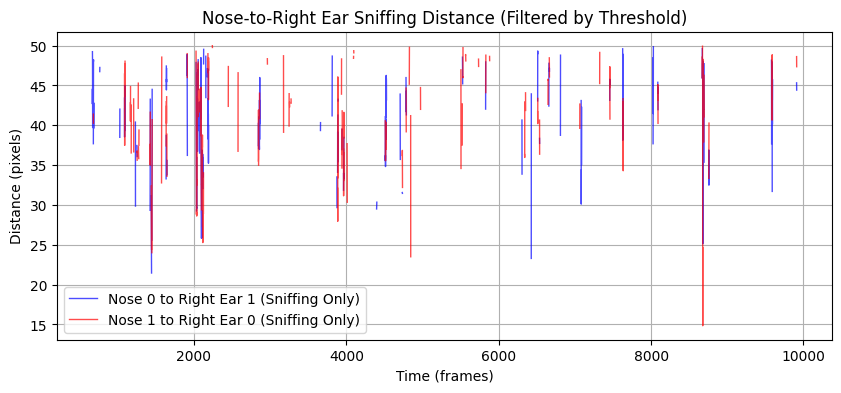

Nose-to-right ear sniffing duration (total): 23.20 seconds


In [22]:
# Define the threshold for nose-to-right ear sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and right ears
nose_ind = node_names.index("nose")
right_ear_ind = node_names.index("right_ear")
noses = trx[:, :, nose_ind]
right_ears = trx[:, :, right_ear_ind]

# Compute the distances between noses and right ears
nose_to_right_ear = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(right_ears, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-right ear sniffing
nose_to_right_ear_sniffing_0_1 = np.where(nose_to_right_ear[:10200, 0, 1] <= threshold_pixels, nose_to_right_ear[:10200, 0, 1], np.nan)
nose_to_right_ear_sniffing_1_0 = np.where(nose_to_right_ear[:10200, 1, 0] <= threshold_pixels, nose_to_right_ear[:10200, 1, 0], np.nan)

# Plot the nose-to-right ear sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(nose_to_right_ear_sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Right Ear 1 (Sniffing Only)", color="blue")
plt.plot(nose_to_right_ear_sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Right Ear 0 (Sniffing Only)", color="red")

plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Right Ear Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-right ear sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_right_ear_sniffing_0_1))  # Count sniffing frames for Nose 0 to Right Ear 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_right_ear_sniffing_1_0))  # Count sniffing frames for Nose 1 to Right Ear 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-right ear sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


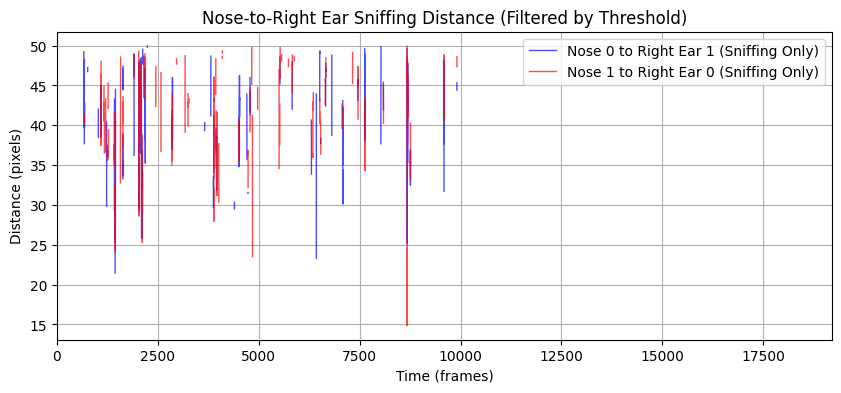

Nose-to-right ear sniffing duration (total): 23.20 seconds


In [23]:
# Define the threshold for nose-to-right ear sniffing (1 cm = 50 pixels)
threshold_pixels = 50  # 0 to 1 cm in pixels

# Pull out the coordinates for noses and right ears
nose_ind = node_names.index("nose")
right_ear_ind = node_names.index("right_ear")
noses = trx[:, :, nose_ind]
right_ears = trx[:, :, right_ear_ind]

# Compute the distances between noses and right ears
nose_to_right_ear = np.linalg.norm(
    np.expand_dims(noses, axis=2) - np.expand_dims(right_ears, axis=1), axis=-1
)

# Filter distances within the threshold for nose-to-right ear sniffing
nose_to_right_ear_sniffing_0_1 = np.where(nose_to_right_ear[:10200, 0, 1] <= threshold_pixels, nose_to_right_ear[:10200, 0, 1], np.nan)
nose_to_right_ear_sniffing_1_0 = np.where(nose_to_right_ear[:10200, 1, 0] <= threshold_pixels, nose_to_right_ear[:10200, 1, 0], np.nan)

# Get the total number of frames in the video
total_frames = nose_to_right_ear.shape[0]

# Extend x-axis but plot only for the first 10200 frames
x_values = np.arange(total_frames)
sniffing_0_1 = np.full(total_frames, np.nan)
sniffing_1_0 = np.full(total_frames, np.nan)

# Fill the first 10200 frames with valid data
sniffing_0_1[:10200] = nose_to_right_ear_sniffing_0_1
sniffing_1_0[:10200] = nose_to_right_ear_sniffing_1_0

# Plot the nose-to-right ear sniffing distances
plt.figure(figsize=(10, 4), dpi=100)
plt.plot(x_values, sniffing_0_1, lw=1, alpha=0.7, label="Nose 0 to Right Ear 1 (Sniffing Only)", color="blue")
plt.plot(x_values, sniffing_1_0, lw=1, alpha=0.7, label="Nose 1 to Right Ear 0 (Sniffing Only)", color="red")
plt.xlim(0, total_frames)  # Extend x-axis to the full number of frames
plt.xlabel("Time (frames)")
plt.ylabel("Distance (pixels)")
plt.legend()
plt.title("Nose-to-Right Ear Sniffing Distance (Filtered by Threshold)")
plt.grid(True)
plt.show()

# Calculate nose-to-right ear sniffing duration
fps = 30  # Adjust based on your video frame rate
sniffing_frames_0_1 = np.sum(~np.isnan(nose_to_right_ear_sniffing_0_1))  # Count sniffing frames for Nose 0 to Right Ear 1
sniffing_frames_1_0 = np.sum(~np.isnan(nose_to_right_ear_sniffing_1_0))  # Count sniffing frames for Nose 1 to Right Ear 0
total_sniffing_frames = sniffing_frames_0_1 + sniffing_frames_1_0  # Combine both directions

# Convert frame count to seconds
total_sniffing_duration_seconds = total_sniffing_frames / fps

print(f"Nose-to-right ear sniffing duration (total): {total_sniffing_duration_seconds:.2f} seconds")


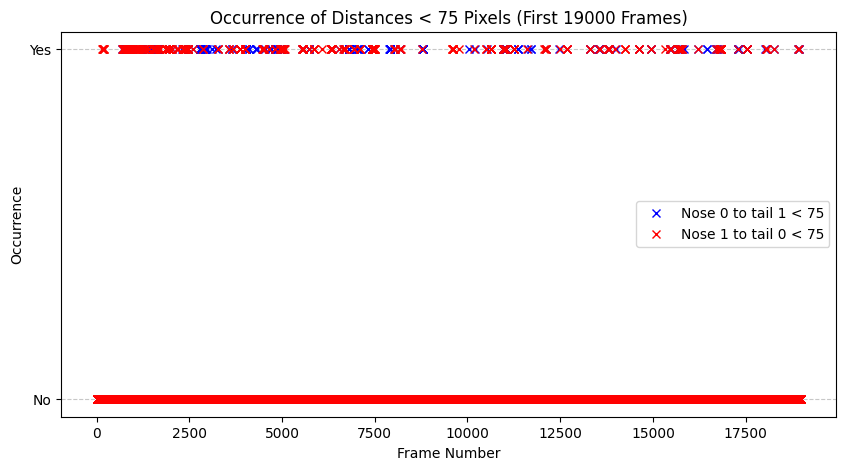

First frames of sequences (Nose 0 to Tail 1 < 75): 155
First frames of sequences (Nose 1 to Tail 0 < 75): 171


In [24]:
# Determine "Yes" or "No" occurrences for distances less than 75
occurrence_0_1 = np.where(nose_to_tail_base[:19000, 0, 1] < 75, "Yes", "No")
occurrence_1_0 = np.where(nose_to_tail_base[:19000, 1, 0] < 75, "Yes", "No")

# Generate x-axis values (frame numbers up to 19000)
frames = np.arange(19000)

# Plot occurrences
plt.figure(figsize=(10, 5))
plt.plot(frames, occurrence_0_1, label="Nose 0 to tail 1 < 75", marker='x', linestyle='', color='b')
plt.plot(frames, occurrence_1_0, label="Nose 1 to tail 0 < 75", marker='x', linestyle='', color='r')
plt.yticks(["No", "Yes"])
plt.title("Occurrence of Distances < 75 Pixels (First 19000 Frames)")
plt.xlabel("Frame Number")
plt.ylabel("Occurrence")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Function to find the first frame in each sequence where distance < 75
def find_first_in_sequences(occurrences):
    is_below_75 = (occurrences == "Yes")
    diff = np.diff(is_below_75.astype(int))
    sequence_starts = np.where(diff == 1)[0] + 1  # Add 1 to shift to start index
    if is_below_75[0]:
        sequence_starts = np.insert(sequence_starts, 0, 0)  # Include 0 if the sequence starts there
    return sequence_starts

# Find sequences for both conditions
sequence_starts_0_1 = find_first_in_sequences(occurrence_0_1)
sequence_starts_1_0 = find_first_in_sequences(occurrence_1_0)

# Print results
print("First frames of sequences (Nose 0 to Tail 1 < 75):", len(sequence_starts_0_1))
print("First frames of sequences (Nose 1 to Tail 0 < 75):", len(sequence_starts_1_0))


In [25]:
import numpy as np

# Assuming the arrays are already defined
arrays = [
    nose_to_right_ear_sniffing_0_1,
    nose_to_right_ear_sniffing_1_0,
    nose_to_left_ear_sniffing_0_1,
    nose_to_left_ear_sniffing_1_0,
    nose_to_nose_sniffing,
    nose_to_neck_sniffing_0_1,
    nose_to_neck_sniffing_1_0,
    nose_to_tail_sniffing_0_1,
    nose_to_tail_sniffing_1_0,
]

array_descriptions = [
    "Nose 0 to Right Ear 1",
    "Nose 1 to Right Ear 0",
    "Nose 0 to Left Ear 1",
    "Nose 1 to Left Ear 0",
    "Nose to Nose",
    "Nose 0 to Neck 1",
    "Nose 1 to Neck 0",
    "Nose 0 to Tail 1",
    "Nose 1 to Tail 0",
]

# List to store occurrences with details
occurrences = []

# Loop through each array and find the first non-NaN occurrence
for description, array in zip(array_descriptions, arrays):
    try:
        first_occurrence = np.nanargmin(np.isnan(array))
        time_in_seconds = first_occurrence / 30
        occurrences.append((description, first_occurrence, time_in_seconds))
    except ValueError:
        # Handle the case where the array is completely NaN
        occurrences.append((description, None, None))

# Sort occurrences by frame number (ignoring None values)
sorted_occurrences = sorted(
    [item for item in occurrences if item[1] is not None],
    key=lambda x: x[1]
)

# Print the results
for description, frame, time in sorted_occurrences:
    print(f"First occurrence of {description}: Frame {frame}, Time {time:.2f} seconds")



First occurrence of Nose 1 to Tail 0: Frame 158, Time 5.27 seconds
First occurrence of Nose 0 to Right Ear 1: Frame 663, Time 22.10 seconds
First occurrence of Nose 0 to Left Ear 1: Frame 663, Time 22.10 seconds
First occurrence of Nose to Nose: Frame 663, Time 22.10 seconds
First occurrence of Nose 0 to Neck 1: Frame 663, Time 22.10 seconds
First occurrence of Nose 1 to Neck 0: Frame 665, Time 22.17 seconds
First occurrence of Nose 1 to Right Ear 0: Frame 679, Time 22.63 seconds
First occurrence of Nose 1 to Left Ear 0: Frame 679, Time 22.63 seconds
First occurrence of Nose 0 to Tail 1: Frame 690, Time 23.00 seconds


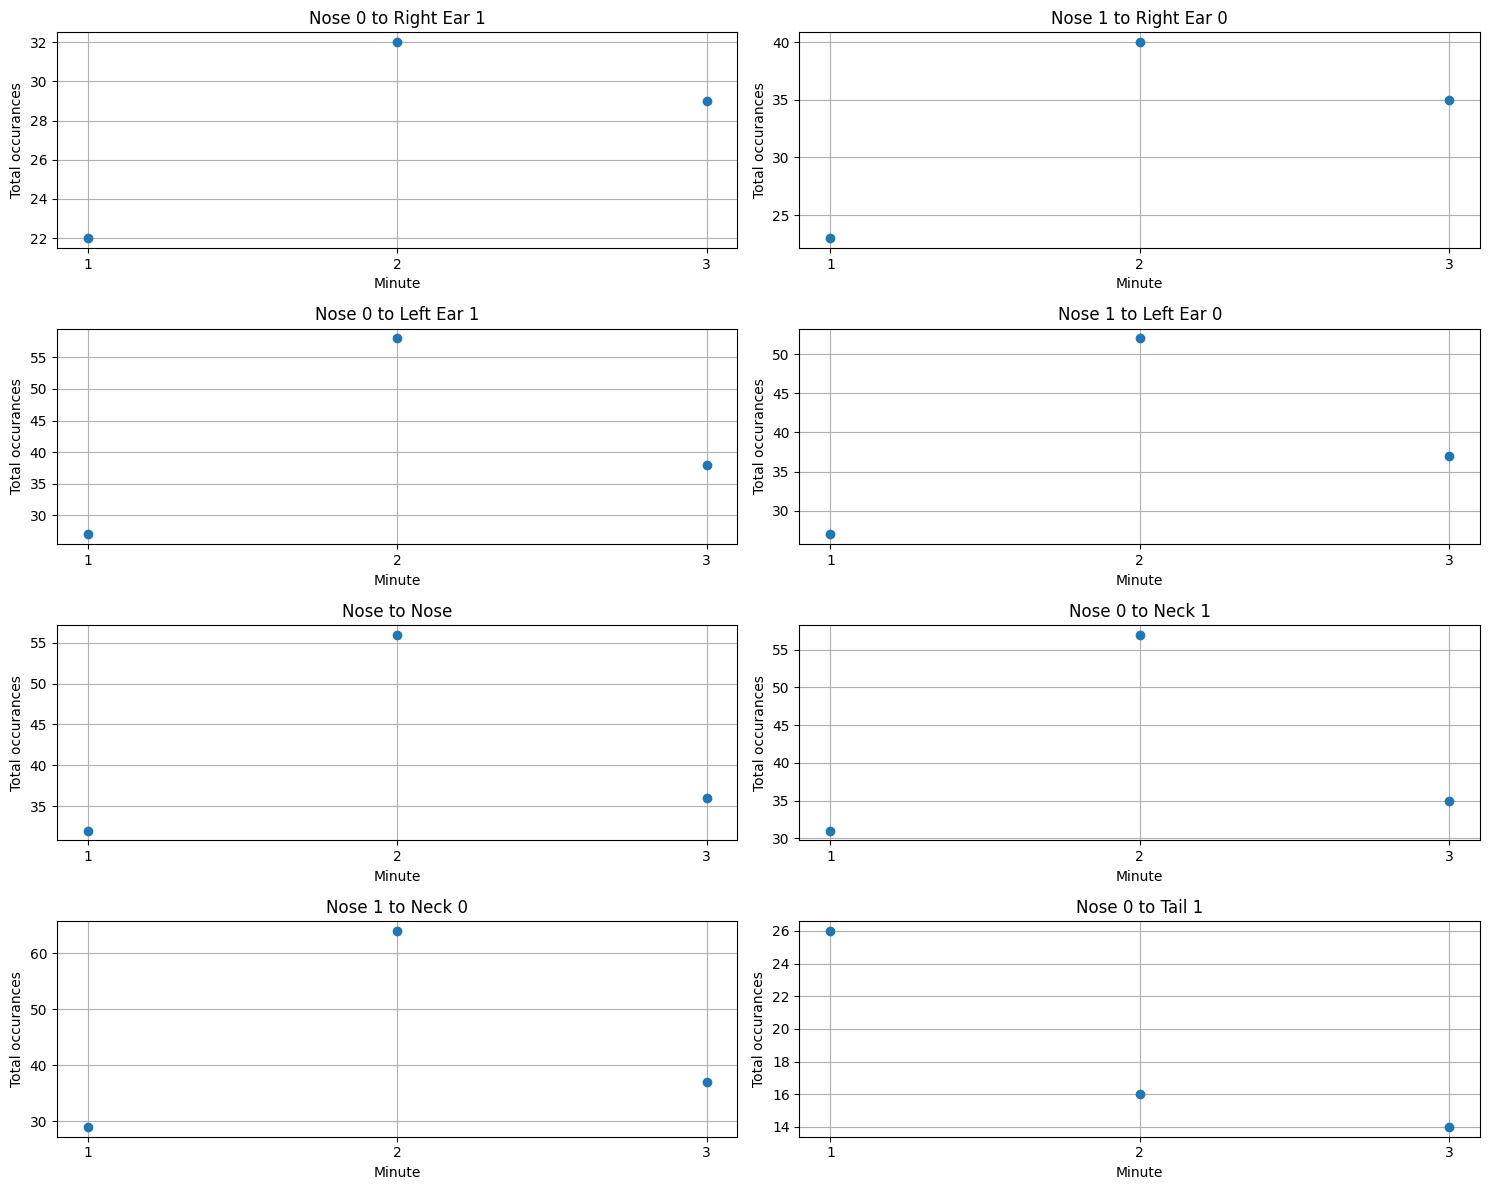

Nose 0 to Right Ear 1:
  Minute 1: 22 occurances
  Minute 2: 32 occurances
  Minute 3: 29 occurances
Nose 1 to Right Ear 0:
  Minute 1: 23 occurances
  Minute 2: 40 occurances
  Minute 3: 35 occurances
Nose 0 to Left Ear 1:
  Minute 1: 27 occurances
  Minute 2: 58 occurances
  Minute 3: 38 occurances
Nose 1 to Left Ear 0:
  Minute 1: 27 occurances
  Minute 2: 52 occurances
  Minute 3: 37 occurances
Nose to Nose:
  Minute 1: 32 occurances
  Minute 2: 56 occurances
  Minute 3: 36 occurances
Nose 0 to Neck 1:
  Minute 1: 31 occurances
  Minute 2: 57 occurances
  Minute 3: 35 occurances
Nose 1 to Neck 0:
  Minute 1: 29 occurances
  Minute 2: 64 occurances
  Minute 3: 37 occurances
Nose 0 to Tail 1:
  Minute 1: 26 occurances
  Minute 2: 16 occurances
  Minute 3: 14 occurances
Nose 1 to Tail 0:
  Minute 1: 43 occurances
  Minute 2: 15 occurances
  Minute 3: 16 occurances


In [26]:
# Limiting the calculations to only 3 intervals
# Define the number of frames per interval
frame_interval = 1800  # Assuming 30 FPS, 1800 frames = 1 minute
num_intervals = 3
interval_data = {}

for description, array in zip(array_descriptions, arrays):
    # Ensure it's a NumPy array and handle valid occurrences
    valid_occurrences = ~np.isnan(array)

    # Convert valid occurrences to binary (1 for "Yes", 0 for "No")
    binary_occurrences = valid_occurrences.astype(int)

    # Calculate changes from "No" to "Yes" (0 -> 1)
    transitions = np.diff(binary_occurrences, prepend=0)
    no_to_yes_transitions = np.where(transitions == 1)[0]  # Frames where transitions occur

    # Calculate occurrences in only the first 3 intervals
    interval_occurrences = []
    for i in range(num_intervals):  # Limit to 3 intervals
        start = i * frame_interval
        end = start + frame_interval

        # Count transitions within the interval
        interval_transitions = no_to_yes_transitions[(no_to_yes_transitions >= start) & (no_to_yes_transitions < end)]
        occurrences = len(interval_transitions)
        interval_occurrences.append(occurrences)

    interval_data[description] = {
        "occurrences": interval_occurrences,
    }

# Plotting the results for 3 intervals
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, (description, data) in zip(axes, interval_data.items()):
    ax.plot(range(1, 4), data["occurrences"], marker='o', linestyle='', linewidth=2)
    ax.set_title(description)
    ax.set_ylabel("Total occurances")
    ax.set_xlabel("Minute")
    ax.grid(True)
    ax.set_xticks(range(1, 4))

plt.tight_layout()
plt.show()

# Print results for 3 intervals
for description, data in interval_data.items():
    print(f"{description}:")
    for i, count in enumerate(data["occurrences"]):
        print(f"  Minute {i+1}: {count} occurances")


In [31]:
# Limiting the calculations to 10 intervals (10 minutes)
# Define the number of frames per interval
frame_interval = 1800  # Assuming 30 FPS, 1800 frames = 1 minute
num_intervals = 10  # 10 intervals for 10 minutes
interval_data = {}

for description, array in zip(array_descriptions, arrays):
    # Ensure it's a NumPy array and handle valid occurrences
    valid_occurrences = ~np.isnan(array)

    # Convert valid occurrences to binary (1 for "Yes", 0 for "No")
    binary_occurrences = valid_occurrences.astype(int)

    # Calculate changes from "No" to "Yes" (0 -> 1)
    transitions = np.diff(binary_occurrences, prepend=0)
    no_to_yes_transitions = np.where(transitions == 1)[0]  # Frames where transitions occur

    # Calculate occurrences in 10 intervals
    interval_occurrences = []
    for i in range(num_intervals):  # Extend to 10 intervals
        start = i * frame_interval
        end = start + frame_interval

        # Count transitions within the interval
        interval_transitions = no_to_yes_transitions[(no_to_yes_transitions >= start) & (no_to_yes_transitions < end)]
        occurrences = len(interval_transitions)
        interval_occurrences.append(occurrences)

    interval_data[description] = {
        "occurrences": interval_occurrences,
        "total_occurrences": sum(interval_occurrences),  # Sum total occurrences over all intervals
    }

# Print total occurrences for each category across 10 minutes
for description, data in interval_data.items():
    print(f"Total occurrences for {description}: {data['total_occurrences']}")


Total occurrences for Nose 0 to Right Ear 1: 135
Total occurrences for Nose 1 to Right Ear 0: 152
Total occurrences for Nose 0 to Left Ear 1: 176
Total occurrences for Nose 1 to Left Ear 0: 171
Total occurrences for Nose to Nose: 203
Total occurrences for Nose 0 to Neck 1: 196
Total occurrences for Nose 1 to Neck 0: 209
Total occurrences for Nose 0 to Tail 1: 73
Total occurrences for Nose 1 to Tail 0: 99


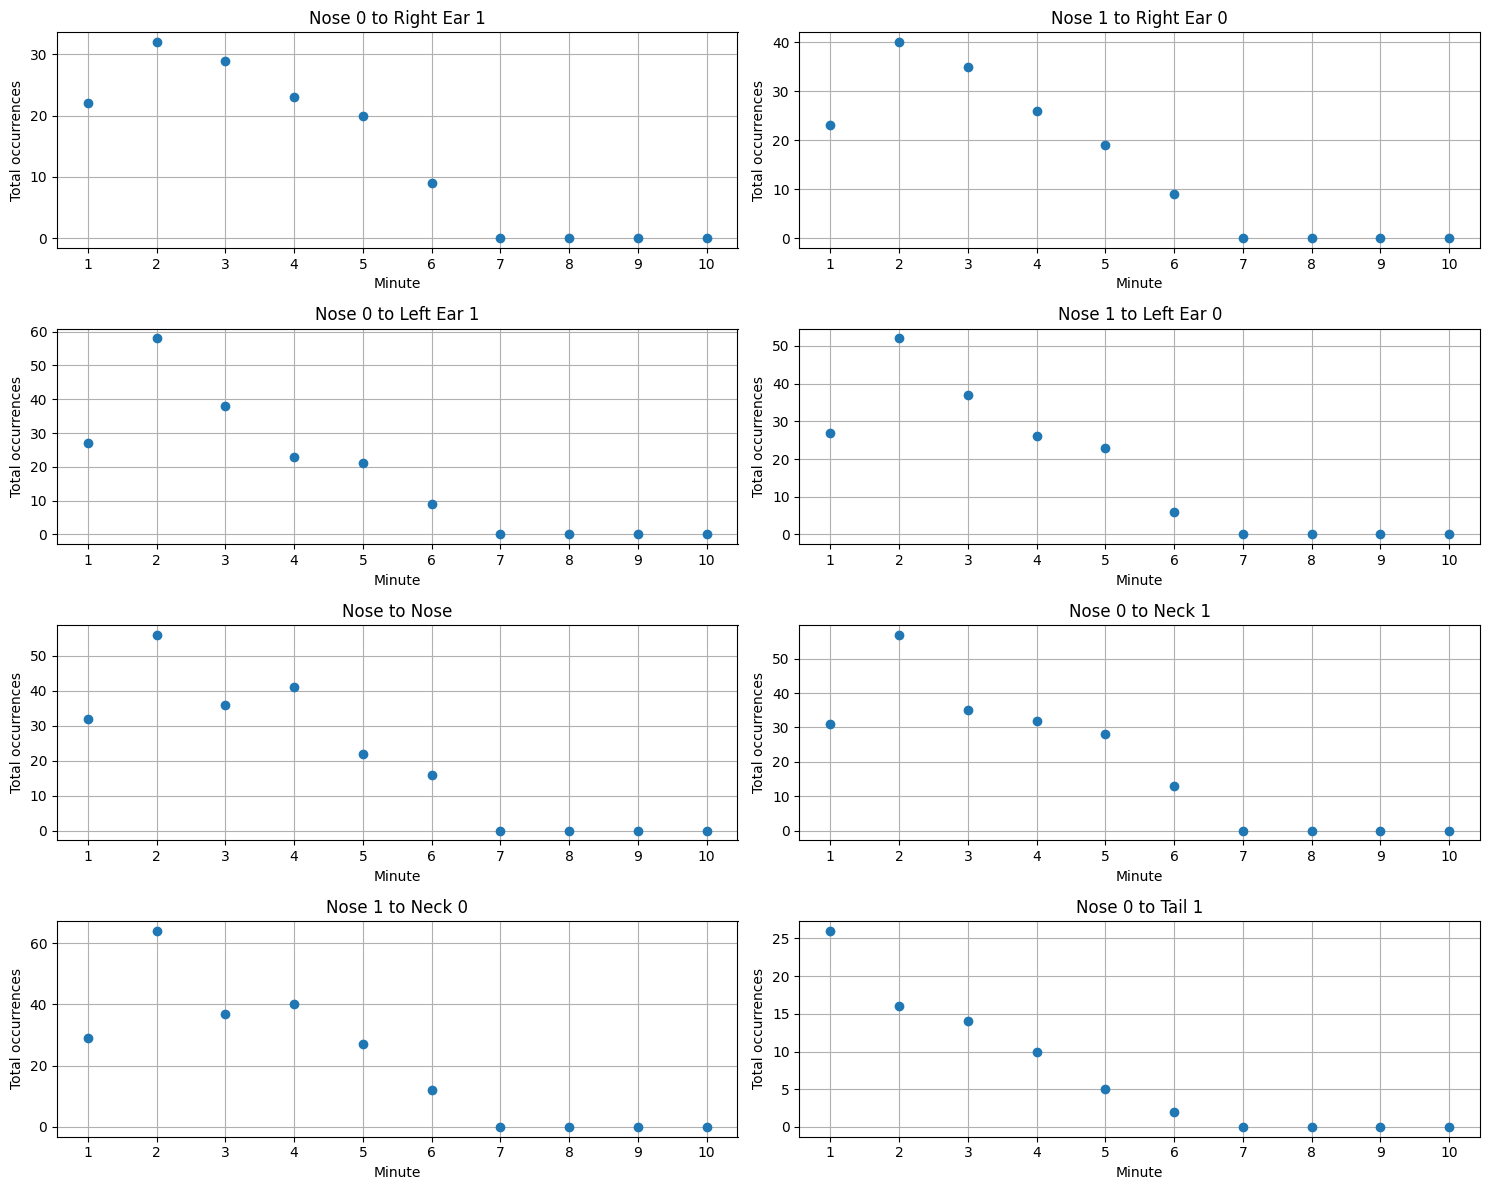

Nose 0 to Right Ear 1:
  Minute 1: 22 occurrences
  Minute 2: 32 occurrences
  Minute 3: 29 occurrences
  Minute 4: 23 occurrences
  Minute 5: 20 occurrences
  Minute 6: 9 occurrences
  Minute 7: 0 occurrences
  Minute 8: 0 occurrences
  Minute 9: 0 occurrences
  Minute 10: 0 occurrences
Nose 1 to Right Ear 0:
  Minute 1: 23 occurrences
  Minute 2: 40 occurrences
  Minute 3: 35 occurrences
  Minute 4: 26 occurrences
  Minute 5: 19 occurrences
  Minute 6: 9 occurrences
  Minute 7: 0 occurrences
  Minute 8: 0 occurrences
  Minute 9: 0 occurrences
  Minute 10: 0 occurrences
Nose 0 to Left Ear 1:
  Minute 1: 27 occurrences
  Minute 2: 58 occurrences
  Minute 3: 38 occurrences
  Minute 4: 23 occurrences
  Minute 5: 21 occurrences
  Minute 6: 9 occurrences
  Minute 7: 0 occurrences
  Minute 8: 0 occurrences
  Minute 9: 0 occurrences
  Minute 10: 0 occurrences
Nose 1 to Left Ear 0:
  Minute 1: 27 occurrences
  Minute 2: 52 occurrences
  Minute 3: 37 occurrences
  Minute 4: 26 occurrences
  Mi

In [28]:
# Limiting the calculations to 10 intervals (10 minutes)
# Define the number of frames per interval
frame_interval = 1800  # Assuming 30 FPS, 1800 frames = 1 minute
num_intervals = 10  # 10 intervals for 10 minutes
interval_data = {}

for description, array in zip(array_descriptions, arrays):
    # Ensure it's a NumPy array and handle valid occurrences
    valid_occurrences = ~np.isnan(array)

    # Convert valid occurrences to binary (1 for "Yes", 0 for "No")
    binary_occurrences = valid_occurrences.astype(int)

    # Calculate changes from "No" to "Yes" (0 -> 1)
    transitions = np.diff(binary_occurrences, prepend=0)
    no_to_yes_transitions = np.where(transitions == 1)[0]  # Frames where transitions occur

    # Calculate occurrences in 10 intervals
    interval_occurrences = []
    for i in range(num_intervals):  # Extend to 10 intervals
        start = i * frame_interval
        end = start + frame_interval

        # Count transitions within the interval
        interval_transitions = no_to_yes_transitions[(no_to_yes_transitions >= start) & (no_to_yes_transitions < end)]
        occurrences = len(interval_transitions)
        interval_occurrences.append(occurrences)

    interval_data[description] = {
        "occurrences": interval_occurrences,
    }

# Plotting the results for 10 intervals
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()

for ax, (description, data) in zip(axes, interval_data.items()):
    ax.plot(range(1, num_intervals + 1), data["occurrences"], marker='o', linestyle='', linewidth=2)
    ax.set_title(description)
    ax.set_ylabel("Total occurrences")
    ax.set_xlabel("Minute")
    ax.grid(True)
    ax.set_xticks(range(1, num_intervals + 1))

plt.tight_layout()
plt.show()

# Print results for 10 intervals
for description, data in interval_data.items():
    print(f"{description}:")
    for i, count in enumerate(data["occurrences"]):
        print(f"  Minute {i+1}: {count} occurrences")


In [32]:
# Initialize variables for total calculations
fps = 30  # Adjust based on the video frame rate
total_events = 0
total_frames = 0

# Iterate through descriptions and arrays to calculate averages and total averages
for description, array in zip(array_descriptions, arrays):
    # Ensure it's a NumPy array and handle valid occurrences
    valid_occurrences = ~np.isnan(array)

    # Convert valid occurrences to binary (1 for "Yes", 0 for "No")
    binary_occurrences = valid_occurrences.astype(int)

    # Calculate changes from "No" to "Yes" (0 -> 1)
    transitions = np.diff(binary_occurrences, prepend=0)
    no_to_yes_transitions = np.where(transitions == 1)[0]  # Frames where transitions occur

    # Calculate occurrences in 10 intervals
    interval_occurrences = []
    for i in range(num_intervals):  # Extend to 10 intervals
        start = i * frame_interval
        end = start + frame_interval

        # Count transitions within the interval
        interval_transitions = no_to_yes_transitions[(no_to_yes_transitions >= start) & (no_to_yes_transitions < end)]
        occurrences = len(interval_transitions)
        interval_occurrences.append(occurrences)

    interval_data[description] = {
        "occurrences": interval_occurrences,
        "total_occurrences": sum(interval_occurrences),  # Sum total occurrences over all intervals
    }

    # Calculate total occurrences and frames for this description
    total_occurrences = sum(interval_occurrences)
    total_valid_frames = np.sum(valid_occurrences)

    # Calculate average duration for this description
    average_duration = (total_valid_frames / fps) / total_occurrences if total_occurrences > 0 else 0

    # Update global totals
    total_events += total_occurrences
    total_frames += total_valid_frames

    # Print the average duration for this description
    print(f"Average duration for {description}: {average_duration:.2f} seconds")

# Calculate overall average duration
overall_average_duration = (total_frames / fps) / total_events if total_events > 0 else 0

# Print the overall average duration
print(f"Overall average duration across all descriptions: {overall_average_duration:.2f} seconds")


Average duration for Nose 0 to Right Ear 1: 0.09 seconds
Average duration for Nose 1 to Right Ear 0: 0.08 seconds
Average duration for Nose 0 to Left Ear 1: 0.09 seconds
Average duration for Nose 1 to Left Ear 0: 0.09 seconds
Average duration for Nose to Nose: 0.12 seconds
Average duration for Nose 0 to Neck 1: 0.08 seconds
Average duration for Nose 1 to Neck 0: 0.08 seconds
Average duration for Nose 0 to Tail 1: 0.06 seconds
Average duration for Nose 1 to Tail 0: 0.07 seconds
Overall average duration across all descriptions: 0.09 seconds
